In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [3]:
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']


In [6]:
df = pd.read_csv(url, names=columns)
print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [7]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [8]:
print("\nCheck for Null Values:")
print(df.isnull().sum())


Check for Null Values:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


In [9]:
X = df.drop('Species', axis=1)
Y = df['Species']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print("\nData Preprocessing Completed Successfully!")


Data Preprocessing Completed Successfully!


In [14]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [15]:
Y_pred = gaussian.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall = recall_score(Y_test, Y_pred,average='micro')

In [27]:
print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [28]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


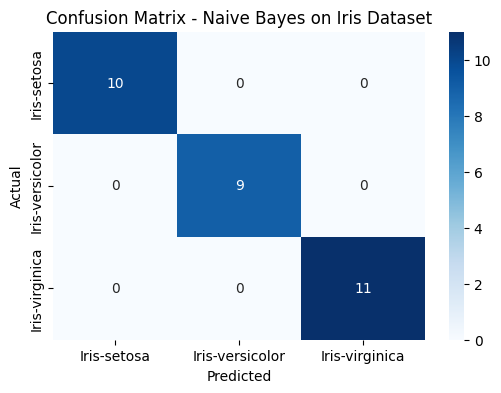

In [29]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Naive Bayes on Iris Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()